# Helmholtz Machine. Wake-Sleep algorithm

Data $\boldsymbol{x}$ are generated by a random process involving
latent random variables (explanations) $\boldsymbol{z}$. Encoder
(recognition model) $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$
produces distribution over the possible values of $\boldsymbol{z}$
from which the datapoint $\boldsymbol{x}$ could have been generated.
Decoder (generative model) $p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})$
produces a distribution of the state $\boldsymbol{x},\boldsymbol{z}$.
The model if fitted to a given dataset by maximizing the evidence
$\log p_{\boldsymbol{\theta}}(\boldsymbol{x})$ (minimizing the generative
surprise $-\log p_{\boldsymbol{\theta}}(\boldsymbol{x})$).

We have
$$
\log p_{\boldsymbol{\theta}}(\boldsymbol{x})=\log p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})-\log p_{\boldsymbol{\theta}}(\boldsymbol{z}|\boldsymbol{x})\,.
$$
Averaging over latent variables using probability distribution $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$
we obtain
\begin{align*}
\log p_{\boldsymbol{\theta}}(\boldsymbol{x}) & =\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}[\log p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})]-\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}[\log q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})]+\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}\left[\log\frac{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}{p_{\boldsymbol{\theta}}(\boldsymbol{z}|\boldsymbol{x})}\right]\\
 & =-F_{\boldsymbol{\theta},\boldsymbol{\phi}}(\boldsymbol{x})+D_{\mathrm{KL}}(q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})||p_{\boldsymbol{\theta}}(\boldsymbol{z}|\boldsymbol{x}))\,.
\end{align*}
Here $F_{\boldsymbol{\theta},\boldsymbol{\phi}}(\boldsymbol{x})$
is the variational free energy
$$
F_{\boldsymbol{\theta},\boldsymbol{\phi}}(\boldsymbol{x})=\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}[E_{\boldsymbol{\theta}}(\boldsymbol{z},\boldsymbol{x})]-H_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}(\boldsymbol{x})\,,
$$
where
$$
H_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}(\boldsymbol{x})=-\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}[\log q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})]
$$
is the entropy and
$$
E_{\boldsymbol{\theta}}(\boldsymbol{z},\boldsymbol{x})=-\log p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})
$$
the energy of explanation $\boldsymbol{z}$ (generative energy; surprise
associated with the occurrence of a state $\boldsymbol{x},\boldsymbol{z}$).
The last term $D_{\mathrm{KL}}$ is the Kullback-Leibler divergence
between $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$ and
the posterior distribution $p_{\boldsymbol{\theta}}(\boldsymbol{z}|\boldsymbol{x})$.
This term cannot be negative, thus
$$
\log p_{\boldsymbol{\theta}}(\boldsymbol{x})\geq-F_{\boldsymbol{\theta},\boldsymbol{\phi}}(\boldsymbol{x})\,.
$$
Therefore fitting of the model involves minimizing the free energy
$F_{\boldsymbol{\theta},\boldsymbol{\phi}}(\boldsymbol{x})$.

### Wake phase

During the wake phase the encoder is frozen, thus during the wake
phase we minimize $\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}[-\log p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})]$.
The average $\mathbb{E}_{q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})}$
is estimated by sampling one value of $\boldsymbol{z}$ from $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$
and decomposing $\log p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})=\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})+\log p_{\boldsymbol{\theta}}(\boldsymbol{z})$.

If the distribution $p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})$
is an isotropic Gaussian, $p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})=\mathcal{N}(\boldsymbol{x},\boldsymbol{\mu}_{\boldsymbol{\theta}}(\boldsymbol{z}),\sigma_{\boldsymbol{\theta}}^{2}(\boldsymbol{z})\boldsymbol{I})$,
then
$$
-\log p_{\boldsymbol{\theta}}(\boldsymbol{x}|\boldsymbol{z})=\frac{1}{2\sigma_{\boldsymbol{\theta}}^{2}(\boldsymbol{z})}N_{\mathrm{data}}\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\boldsymbol{z}),\boldsymbol{x})+N_{\mathrm{data}}\log\sigma_{\boldsymbol{\theta}}(\boldsymbol{z})\sqrt{2\pi}\,,
$$
where $N_{\mathrm{data}}$ is the dimensionality of $\boldsymbol{x}$. Optimal value of $\sigma_{\boldsymbol{\theta}}$ is given by $\sigma_{\boldsymbol{\theta}}^{2}=\mathrm{MSE}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\boldsymbol{z}),\boldsymbol{x})$.

### Sleep phase

During the sleep phase the decoder is frozen and the Kullback-Leibler
divergence $D_{\mathrm{KL}}(p_{\boldsymbol{\theta}}(\boldsymbol{z}|\boldsymbol{x})||q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x}))$
is minimized. Since the decoder is frozen, this is equivalent to minimizing
$\mathbb{E}_{p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})}[-\log q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})]$.
The average $\mathbb{E}_{p_{\boldsymbol{\theta}}(\boldsymbol{x},\boldsymbol{z})}$
is estimated by sampling one value of the pair $\boldsymbol{x},\boldsymbol{z}$.
This pair can be created as follows: we sample $\boldsymbol{z}$ from
the prior distribution over the latent variables $p_{\boldsymbol{\theta}}(\boldsymbol{z})$
and feed it forward through generative model to produce $\boldsymbol{x}$.

If the approximate posterior distribution of the latent variables
$q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})$ is a multivariate
Gaussian, $q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})=\mathcal{N}(\boldsymbol{z},\boldsymbol{\mu}_{\boldsymbol{\phi}}(\boldsymbol{x}),\boldsymbol{\sigma}_{\boldsymbol{\phi}}^{2}(\boldsymbol{x})\boldsymbol{I})$,
then
$$
-\log q_{\boldsymbol{\phi}}(\boldsymbol{z}|\boldsymbol{x})=\sum_{j=1}^{N_{\mathrm{latent}}}\left(\frac{1}{2\sigma_{j}^{2}}(z_{j}-\mu_{j})^{2}+\log\sigma_{j}\sqrt{2\pi}\right)\,.
$$

## Configuration

Imports

In [1]:
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.v2 as transforms
from torchvision import datasets
import torchvision.utils as vision_utils

Configuration

In [2]:
DATA_DIR = Path("./data")
MODELS_DIR = Path("./models")

NUM_WORKERS = 8
BATCH_SIZE = 128

IMAGE_SIZE = 128
IMAGE_CHANNELS = 3
LATENT_CHANNELS = 16

EPOCHS = 40
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-1

PRINT_FREQ = 500

In [3]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

Device: cuda


## Model

We create fully convolutional encoder and decoder.

### Model utilities

In [4]:
def init_model(model):
    for m in model.modules():
        if isinstance(m, (nn.Linear, nn.Conv2d, nn.ConvTranspose2d)):
            nn.init.kaiming_normal_(m.weight)
            if m.bias is not None: nn.init.zeros_(m.bias)
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.ones_(m.weight)
            nn.init.zeros_(m.bias)

In [5]:
class ConvBlock(nn.Sequential):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1):
        padding = (kernel_size - 1) // 2
        super().__init__(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

In [6]:
class Stack(nn.Sequential):
    def __init__(self, channels_list, block):
        layers = []
        for in_channels, out_channels in zip(channels_list[:-1], channels_list[1:]):
            layers.append(block(in_channels, out_channels))
        super().__init__(*layers)

### Helmholtz machine

Encoder

In [7]:
class DownBlock(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super().__init__(
            nn.MaxPool2d(2),
            ConvBlock(in_channels, out_channels, 3)
        )

In [8]:
class Encoder(nn.Module):
    def __init__(self, in_channels, channels_list, latent_channels):
        super().__init__()
        self.stem = ConvBlock(in_channels, channels_list[0], 3)
        self.blocks = Stack(channels_list, DownBlock)
        self.to_params = nn.Conv2d(channels_list[-1], 2 * latent_channels, 3, padding=1)
    
    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.to_params(x)
        mu, log_var = x.chunk(2, dim=1)
        return mu, log_var

Decoder

In [9]:
class UpBlock(nn.Sequential):
    def __init__(self, in_channels, out_channels):
        super().__init__(
            nn.Upsample(scale_factor=2, mode='nearest'),
            ConvBlock(in_channels, out_channels, 3)
        )

In [10]:
class Decoder(nn.Module):
    def __init__(self, latent_channels, channels_list, out_channels, latent_h, latent_w, α=0.1):
        super().__init__()
        self.stem = ConvBlock(latent_channels, channels_list[0], 3)
        self.blocks = Stack(channels_list, UpBlock)
        self.to_output = nn.Conv2d(channels_list[-1], out_channels, 3, padding=1)
        self.register_buffer("latent_prior", torch.zeros(1, 2 * latent_channels, latent_h, latent_w))
        self.α = α
    
    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.to_output(x)
        x = torch.sigmoid(x)
        return x

    def sample_latent(self, num_samples):
        latent_prior = self.latent_prior.expand(num_samples, -1, -1, -1)
        mu, log_var = latent_prior.chunk(2, dim=1)
        z = torch.normal(mu, torch.exp(0.5 * log_var))
        return z

    def update_latent_prior(self, z):
        var, mu = torch.var_mean(z, dim=0, correction=0)
        current_latent_prior = torch.cat((mu, torch.log(var)), dim=0).unsqueeze(0)
        self.latent_prior = torch.lerp(self.latent_prior, current_latent_prior, self.α)

Helmholtz machine

In [11]:
class HelmholtzMachine(nn.Module):
    def __init__(self, num_downsamplings, latent_channels, channels, shape, in_channels=3):
        super().__init__()
        reduction = 2**num_downsamplings
        
        channels_list = [channels * 2**i for i in range(num_downsamplings + 1)]
        self.encoder = Encoder(in_channels, channels_list, latent_channels)
        channels_list.reverse()
        self.decoder = Decoder(latent_channels, channels_list, in_channels, shape[0] // reduction, shape[1] // reduction)

    def wake(self, x):
        with torch.no_grad():
            mu, log_var = self.encoder(x)
            z = torch.normal(mu, torch.exp(0.5 * log_var))

        x_reconst = self.decoder(z)
        self.decoder.update_latent_prior(z)
        loss = self.reconst_loss(x_reconst, x)
        return loss

    def sleep(self, x):
        with torch.no_grad():
            z = self.decoder.sample_latent(x.size(0))
            x_gen = self.decoder(z)

        mu, log_var = self.encoder(x_gen)
        loss = self.gauss_loss(mu, log_var, z)
        return loss

    @staticmethod
    def gauss_loss(mu, log_var, z):
        loss = (z - mu)**2 / log_var.exp() + log_var
        loss = torch.mean(loss)
        return loss

    @staticmethod
    def reconst_loss(x_reconst, x):
        loss = torch.log(torch.mean((x_reconst - x)**2, dim=(1, 2, 3)))
        loss = torch.mean(loss)
        return loss

    def generate(self, num_samples):
        z = self.decoder.sample_latent(num_samples)
        x_gen = self.decoder(z)
        return x_gen

    def forward(self, x, sample=False):
        mu, log_var = self.encoder(x)
        z = torch.normal(mu, torch.exp(0.5 * log_var)) if sample else mu
        x_gen = self.decoder(z)
        return x_gen

### Model creation

In [12]:
model = HelmholtzMachine(num_downsamplings=5, latent_channels=LATENT_CHANNELS, channels=16,
                         shape=(IMAGE_SIZE, IMAGE_SIZE), in_channels=IMAGE_CHANNELS)

In [13]:
init_model(model)

In [14]:
model = model.to(DEVICE)

In [15]:
print("Number of encoder parameters: {:,}".format(sum(p.numel() for p in model.encoder.parameters())))
print("Number of decoder parameters: {:,}".format(sum(p.numel() for p in model.decoder.parameters())))
print("Number of parameters: {:,}".format(sum(p.numel() for p in model.parameters())))

Number of encoder parameters: 1,721,264
Number of decoder parameters: 1,647,507
Number of parameters: 3,368,771


## Plotting utilities

In [16]:
def plot_batch(ax, batch, title=None, **kwargs):
    imgs = vision_utils.make_grid(batch, padding=2, normalize=True)
    imgs = np.moveaxis(imgs.numpy(), 0, -1)
    ax.set_axis_off()
    if title is not None: ax.set_title(title)
    return ax.imshow(imgs, **kwargs)

In [17]:
def show_images(batch, title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    plot_batch(ax, batch, title)
    plt.show()

In [18]:
def show_2_batches(batch1, batch2, title1, title2):
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(121)
    plot_batch(ax, batch1, title1)

    ax = fig.add_subplot(122)
    plot_batch(ax, batch2, title2)
    plt.show()

## Data

In [19]:
train_transform = transforms.Compose([
    transforms.ToImage(),
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToDtype(torch.float32, scale=True),
])

In [20]:
val_transform = transforms.Compose([
    transforms.ToImage(),
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToDtype(torch.float32, scale=True),
])

In [21]:
train_dset = datasets.CelebA(str(DATA_DIR), split='train', transform=train_transform, download=False)
val_dset = datasets.CelebA(str(DATA_DIR), split='test', transform=val_transform, download=False)

In [22]:
train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True,
                                           num_workers=NUM_WORKERS)

val_loader = torch.utils.data.DataLoader(val_dset, batch_size=BATCH_SIZE, shuffle=False,
                                         num_workers=NUM_WORKERS)

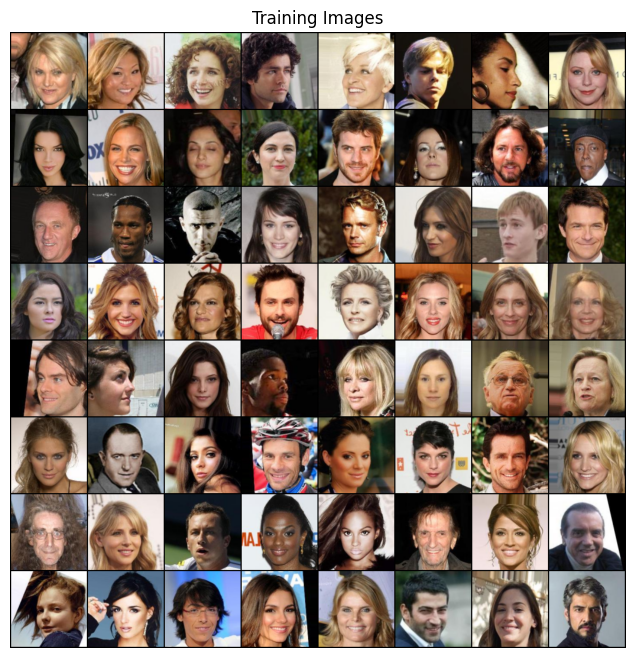

In [23]:
test_batch, _ = next(iter(train_loader))
show_images(test_batch[:64], "Training Images")

## Training

### Optimizer

We exclude the parameters of final encoder and decoder layers from weight decay.

In [24]:
def separate_parameters(model):
    # Separate parameters of the model into groups with weight decay and no weight decay
    # We exclude the parameters of final encoder and decoder layers from weight decay
    parameters_decay = set()
    parameters_no_decay = set()
    names_no_weight_decay = ["to_params", "to_output", "latent_prior"]

    for param_name, param in model.named_parameters():
        if any(name in param_name for name in names_no_weight_decay):
            parameters_no_decay.add(param_name)
        else:
            parameters_decay.add(param_name)
            
    # sanity check
    assert len(parameters_decay & parameters_no_decay) == 0
    assert len(parameters_decay) + len(parameters_no_decay) == len(list(model.parameters()))

    return parameters_decay, parameters_no_decay

In [25]:
def get_optimizer(model, learning_rate, weight_decay):
    param_dict = {pn: p for pn, p in model.named_parameters()}
    parameters_decay, parameters_no_decay = separate_parameters(model)

    optim_groups = [
        {"params": [param_dict[pn] for pn in parameters_decay], "weight_decay": weight_decay},
        {"params": [param_dict[pn] for pn in parameters_no_decay], "weight_decay": 0.0},
    ]
    optimizer = optim.AdamW(optim_groups, lr=learning_rate)
    return optimizer

### Trainer

In [26]:
class Trainer:
    def __init__(self, model, optimizer_wake, optimizer_sleep,
                 train_loader, val_loader, device,
                 batch_scheduler_wake=None, batch_scheduler_sleep=None):
        self.model = model
        self.val_loss = nn.MSELoss()
        self.optimizer_wake = optimizer_wake
        self.optimizer_sleep = optimizer_sleep
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.batch_scheduler_wake = batch_scheduler_wake
        self.batch_scheduler_sleep = batch_scheduler_sleep
        self.history = defaultdict(list)

    def wake(self, images):
        self.optimizer_wake.zero_grad()
        loss = self.model.wake(images)
        loss.backward()
        self.optimizer_wake.step()
        
        if self.batch_scheduler_wake is not None:
            self.batch_scheduler_wake.step()

        self.history['wake loss'].append(loss.item())

    def sleep(self, images):
        self.optimizer_sleep.zero_grad()
        loss = self.model.sleep(images)
        loss.backward()
        self.optimizer_sleep.step()
        
        if self.batch_scheduler_sleep is not None:
            self.batch_scheduler_sleep.step()

        self.history['sleep loss'].append(loss.item())

    def validate(self):
        self.model.eval()
        num_samples = 0
        total_loss = 0.
        for batch in self.val_loader:
            images = batch[0].to(self.device)
            with torch.no_grad():
                outputs = self.model(images)
                loss = self.val_loss(outputs, images)

            batch_size = len(images)
            num_samples += batch_size
            total_loss += batch_size * loss.item()
        
        avg_loss = total_loss / num_samples
        self.history['val loss'].append(avg_loss)

    def print_metrics(self, iters, epoch, epochs):
        print('{} [{}/{}]: wake loss {:.4f}, sleep loss {:.4f}'.format(
            iters, epoch+1, epochs, self.history['wake loss'][-1], self.history['sleep loss'][-1]))

    def print_val_metrics(self, epoch, epochs):
        print(f"Val [{epoch+1}/{epochs}]: loss {self.history['val loss'][-1]:.4f}")
       
    def fit(self, epochs, print_freq):
        iters = 0
        for epoch in range(epochs):
            self.model.train()
            for batch in self.train_loader:
                images = batch[0].to(self.device)
                self.wake(images)
                self.sleep(images)
                
                if iters % print_freq == 0:
                    self.print_metrics(iters, epoch, epochs)
                iters += 1
            
            self.validate()
            self.print_val_metrics(epoch, epochs)
        torch.save(self.model.state_dict(), str(MODELS_DIR / 'final_model.pt'))

### Start Training

In [27]:
optimizer_wake = get_optimizer(model.decoder, LEARNING_RATE, WEIGHT_DECAY)
optimizer_sleep = get_optimizer(model.encoder, LEARNING_RATE, WEIGHT_DECAY)

In [28]:
lr_scheduler_wake = optim.lr_scheduler.OneCycleLR(optimizer_wake, max_lr=LEARNING_RATE,
                                                  steps_per_epoch=len(train_loader), epochs=EPOCHS)

lr_scheduler_sleep = optim.lr_scheduler.OneCycleLR(optimizer_sleep, max_lr=LEARNING_RATE,
                                                   steps_per_epoch=len(train_loader), epochs=EPOCHS)

In [29]:
trainer = Trainer(model, optimizer_wake, optimizer_sleep,
                  train_loader, val_loader, DEVICE,
                  lr_scheduler_wake, lr_scheduler_sleep)

In [30]:
trainer.fit(EPOCHS, PRINT_FREQ)

0 [1/40]: wake loss -2.1318, sleep loss 2.1554
500 [1/40]: wake loss -2.8273, sleep loss 4.0557
1000 [1/40]: wake loss -2.9801, sleep loss 3.3721
Val [1/40]: loss 0.1719
1500 [2/40]: wake loss -2.9996, sleep loss 3.0236
2000 [2/40]: wake loss -3.1451, sleep loss 2.8985
2500 [2/40]: wake loss -3.1568, sleep loss 2.7734
Val [2/40]: loss 0.0994
3000 [3/40]: wake loss -3.2681, sleep loss 2.3341
3500 [3/40]: wake loss -3.3565, sleep loss 1.9383
Val [3/40]: loss 0.0531
4000 [4/40]: wake loss -3.4392, sleep loss 1.5080
4500 [4/40]: wake loss -3.3066, sleep loss 1.0983
5000 [4/40]: wake loss -3.3585, sleep loss 0.6814
Val [4/40]: loss 0.0249
5500 [5/40]: wake loss -3.3974, sleep loss 0.3638
6000 [5/40]: wake loss -3.4090, sleep loss 0.1974
Val [5/40]: loss 0.0290
6500 [6/40]: wake loss -3.3324, sleep loss 0.1428
7000 [6/40]: wake loss -3.3564, sleep loss 0.0600
7500 [6/40]: wake loss -3.2884, sleep loss 0.0024
Val [6/40]: loss 0.0303
8000 [7/40]: wake loss -3.3235, sleep loss -0.0494
8500 [7/4

## Plotting

In [31]:
def plot_history(history, key, epochs=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    xs = np.arange(1, len(history[key]) + 1)
    ax.plot(xs, history[key], '.-')
    xlabel = 'epoch' if epochs else 'iteration'
    ax.set_xlabel(xlabel)
    ax.set_ylabel(key)
    ax.set_title(key.title())
    ax.grid()
    plt.show()

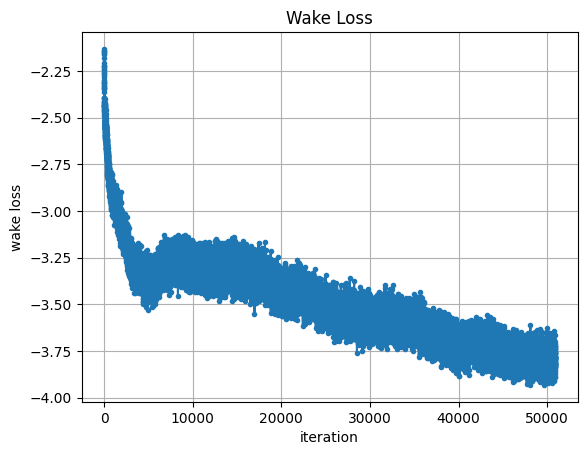

In [32]:
plot_history(trainer.history, 'wake loss')

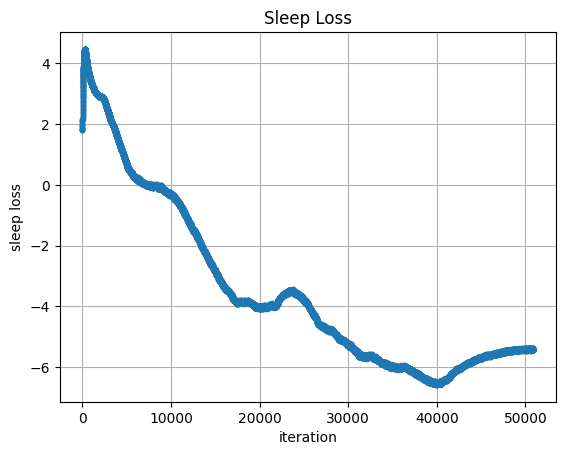

In [33]:
plot_history(trainer.history, 'sleep loss')

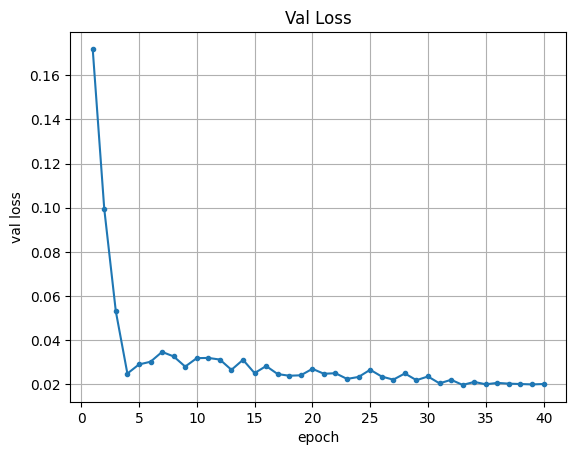

In [34]:
plot_history(trainer.history, 'val loss', True)

## Testing

In [35]:
def reconstruct(model, batch, device):
    batch = batch.to(device)
    with torch.no_grad():
        reconstructed_batch = model(batch)
    reconstructed_batch = reconstructed_batch.cpu()
    return reconstructed_batch

In [36]:
model.load_state_dict(torch.load(str(MODELS_DIR / 'final_model.pt')))

<All keys matched successfully>

In [37]:
model.eval();

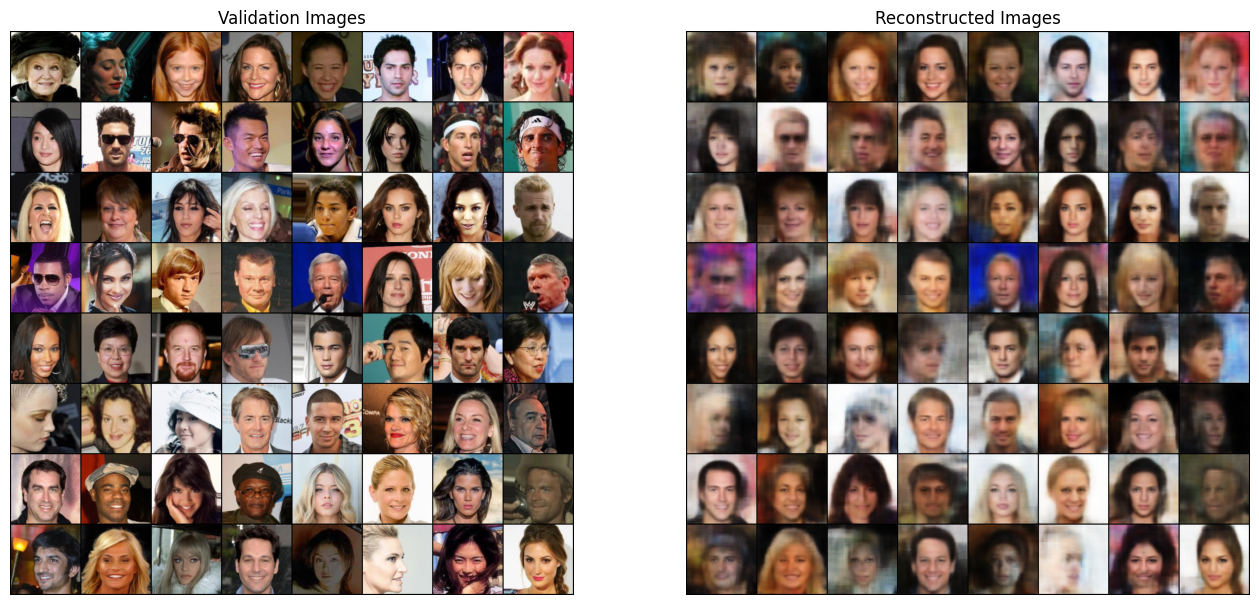

In [38]:
test_batch, _ = next(iter(val_loader))
reconstructed_batch = reconstruct(model, test_batch, DEVICE)
show_2_batches(test_batch[:64], reconstructed_batch[:64], "Validation Images", "Reconstructed Images")

In [39]:
sample_images = model.generate(64)

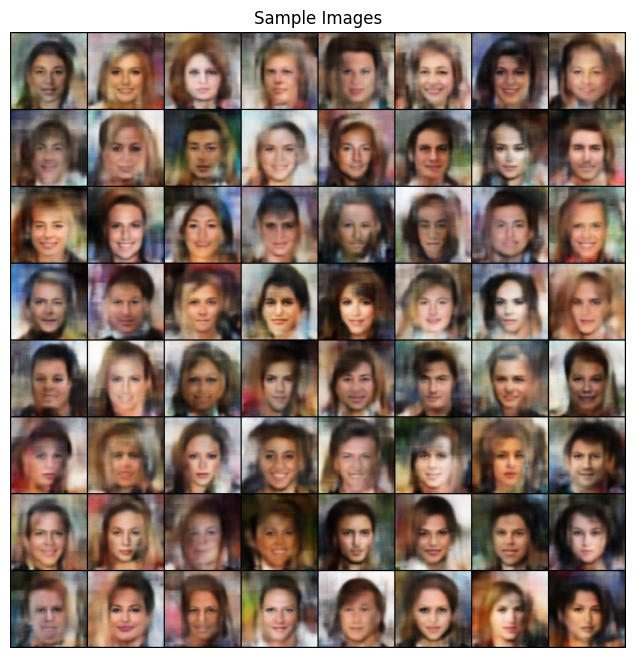

In [40]:
show_images(sample_images.cpu(), "Sample Images")